In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def standardize(data):
    mean = np.mean(data)
    deviation = ((np.sum((data - mean)**2))/len(data))**(0.5)
    data = (data - mean)/deviation
    return data, mean, deviation

In [3]:
def sigmoid(x):
    return (1/(1 + np.exp(-x)))

def diff_sigmoid(x):
    fx = sigmoid(x)
    return fx*(1 - fx)

In [4]:
def mse(pred, label):
    loss = (np.sum((label - pred)**2))/pred.shape[0]
    return loss

def diff_mse(pred, label):
    return (-2)*(label - pred)

In [5]:
def feedforward(inputs, weights, bias):
    output = np.dot(weights, inputs) + bias
    return sigmoid(output)

def backpropogation(inputs, outputs):
    return np.dot(diff_sigmoid(outputs), inputs.T), diff_sigmoid(outputs)

def update(learn_rate, weight, L_W, bias, L_B):
    return weight-learn_rate*L_W , bias-learn_rate*L_B

In [6]:
data = {'height':[153, 170, 182, 160], 
        'weight':[48, 70, 67, 50],
        'gender':[0, 1, 1, 0]}
# Man = 1, Woman = 0
data_df = pd.DataFrame(data)
data_df

,height,weight,gender
0,153,48,0
1,170,70,1
2,182,67,1
3,160,50,0


In [7]:
data_arr = np.array(data_df)
print(data_arr)

ground_truth = data_arr[:,2]
print('ground_truth:',ground_truth)
print(ground_truth.shape)

train_data = data_arr[:,:2].astype('float')
print(train_data)

# standardize
train_data[:,0], height_mean, height_deviation = standardize(train_data[:,0])
train_data[:,1], weight_mean, weight_deviation = standardize(train_data[:,1])
print(train_data)
print(train_data.shape)

[[153  48   0]
 [170  70   1]
 [182  67   1]
 [160  50   0]]
ground_truth: [0 1 1 0]
(4,)
[[153.  48.]
 [170.  70.]
 [182.  67.]
 [160.  50.]]
[[-1.21366974 -1.0932596 ]
 [ 0.34349144  1.14410888]
 [ 1.44266403  0.83901318]
 [-0.57248573 -0.88986246]]
(4, 2)


In [8]:
np.random.seed(7)

input_layer = train_data[0].reshape(2,1)
label = ground_truth[0].reshape(1,1)
output_layer = np.random.randn(1,1)

learn_rate = 0.01
epochs = 1000
neuron_num = 2

weights_1 = np.random.randn(neuron_num, len(input_layer))
bias_1 = np.random.randn(neuron_num, 1)
weights_2 = np.random.randn(len(output_layer), neuron_num)
bias_2 = np.random.randn(len(output_layer), 1)
# print('origin:', weights_1.shape, bias_1.shape, weights_2.shape, bias_2.shape)

history_loss = []

##############################################################################
for epoch in range(epochs):
    for input_layer, label in zip(train_data, ground_truth):
        input_layer = input_layer.reshape(2,1)
        label = label.reshape(1,1)
        
        # feedforward
        hidden_layer1 = feedforward(input_layer, weights_1, bias_1)
        output_layer = feedforward(hidden_layer1, weights_2, bias_2)
    #     print('hidden_layer1', hidden_layer1.shape)
    #     print('output_layer', output_layer.shape)

        loss = mse(output_layer, label)

        diff_loss_pred = diff_mse(output_layer, label)
    #     print('diff_loss_pred',diff_loss_pred.shape)

        # backpropogation
        diff_outputlayer_weight, diff_outputlayer_bias = backpropogation(hidden_layer1, output_layer)
        diff_outputlayer_hiddenlayer, _ = backpropogation(weights_2.T, output_layer)

        diff_hiddenlayer_weight, diff_hiddenlayer_bias = backpropogation(input_layer, hidden_layer1)

    #     print('diff_hiddenlayer_weight', diff_hiddenlayer_weight.shape)
    #     print('diff_hiddenlayer_bias', diff_hiddenlayer_bias.shape)
    #     print('diff_outputlayer_hiddenlayer', diff_outputlayer_hiddenlayer.shape)
    #     print('diff_outputlayer_weight', diff_outputlayer_weight.shape)
    #     print('diff_outputlayer_bias', diff_outputlayer_hiddenlayer.shape)

        # update
        L_W_hiddenlayer = np.dot(np.dot(diff_loss_pred, diff_outputlayer_hiddenlayer), diff_hiddenlayer_weight)
        L_B_hiddenlayer = np.dot(np.dot(diff_loss_pred, diff_outputlayer_hiddenlayer), diff_hiddenlayer_bias)


        L_W_outputlayer = np.dot(diff_loss_pred, diff_outputlayer_weight)
        L_B_outputlayer = np.dot(diff_loss_pred, diff_outputlayer_bias)

        weights_1, bias_1 = update(learn_rate, weights_1, L_W_hiddenlayer, bias_1, L_B_hiddenlayer)

        weights_2, bias_2 = update(learn_rate, weights_2, L_W_outputlayer, bias_2, L_B_outputlayer)

    history_loss = np.append(history_loss, loss)
    
    if epoch%100 == 0:
        print('Loss:',loss)

Loss: 0.3148326787330971
Loss: 0.23643269567822014
Loss: 0.1706756678950057
Loss: 0.11602138240554401
Loss: 0.07578433900341079
Loss: 0.04950147317138092
Loss: 0.033333446694469485
Loss: 0.02343434166217438
Loss: 0.017210099232959745
Loss: 0.01314112518145521


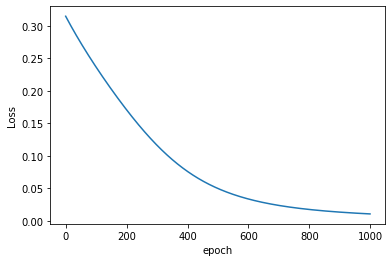

In [9]:
plt.plot(history_loss)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

In [14]:
# predict

def standardize_final(data):
    data[0] = (data[0] - height_mean)/height_deviation
    data[1] = (data[1] - weight_mean)/weight_deviation
    return(data)

someone = np.array([157.0, 46.0]).reshape(2,1)  #必須輸入小數
someone = standardize_final(someone)

hidden_layer1 = feedforward(someone, weights_1, bias_1)
output_layer = feedforward(hidden_layer1, weights_2, bias_2)
print(output_layer)

[[0.09079287]]
